* The problem statement is to create a machine learning model that can predict the salary of newly hired employees at TechWorks Consulting based on various features such as college, city, role, previous CTC, previous job change, graduation marks, experience in months, and CTC.

### TECHWORKS ANALYSIS

My approach will be to follow the machine learning pipeline, which includes:

### * Data Preparation: I handled categorical variables by converting them into numerical representations  and Convert into dummie Data Using Sklearn Split Data Iinto Test(20%) and Train(80%) data.

Remove unnessasary data from database

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [59]:
df1=pd.read_csv('/content/ML case Study.csv',header=0)
df2=pd.read_csv('/content/Colleges.csv',header=0)
df3=pd.read_csv('/content/cities.csv',header=0)

In [60]:
df2.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


## EDD PROCCESS

In [61]:
Tier1=df2["Tier 1"].tolist()
Tier2=df2["Tier 2"].tolist()
Tier3=df2["Tier 3"].tolist()

df2.dropna()

for item in df1.College:
  if item in Tier1:
    df1["College"].replace(item,1,inplace=True)
  elif item in Tier2:
    df1["College"].replace(item,2,inplace=True)
  elif item in Tier3:
    df1["College"].replace(item,3,inplace=True)

In [62]:
df1.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [63]:
metrocity=df3["Metrio City"].tolist()
nonmetrocity=df3["non-metro cities"].tolist()

df3.dropna()
for item in df1.City:
  if item in metrocity:
    df1["City"].replace(item,1,inplace=True)
  elif item in nonmetrocity:
    df1["City"].replace(item,0,inplace=True)

In [64]:
df1.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10


In [65]:
df=pd.get_dummies(df1)

df["Role_Executive"]=df["Role_Executive"].astype(int)
df["Role_Manager"]=df["Role_Manager"].astype(int)

In [66]:
del df["Role_Executive"]

In [67]:
df.head(1000)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0
...,...,...,...,...,...,...,...,...
995,1,1,51564.0,4,37,39,68158.59,0
996,3,1,58789.0,3,73,39,78067.29,0
997,1,0,58063.0,2,63,63,77986.30,0
998,3,0,56799.0,2,56,33,62165.11,0


### * Feature Engineering: I have use correlation analysis and a heatmap to understand relationships between features.


In [68]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


## HEAT MAP

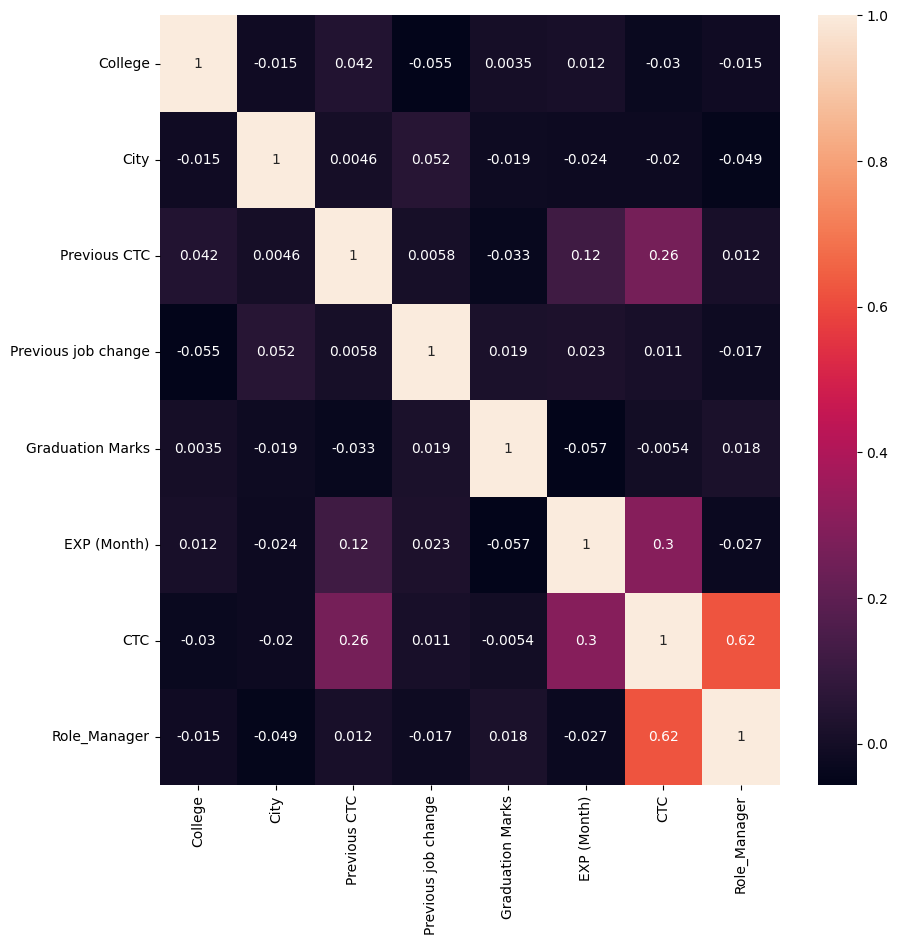

In [69]:
corr_matrix=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)
plt.show()

#### CTC is highly Corelated to EXP(Months),Previous CTC.

## Train_Test_Split

In [70]:
from sklearn.model_selection import train_test_split

x=df.drop(['CTC'],axis=1)
y=df['CTC']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(1271, 7) (318, 7) (1271,) (318,)


### * Model Training: Train the model using the preprocessed data.
Linear Regression: A good baseline model. I have  used both statsmodels and scikit-learn for this.


## Multi Linear Using STATS MODEL

In [71]:
import statsmodels.api as sm
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          4.70e-257
Time:                        11:51:47   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2192.660     17.523      0.000    3.41e+04    4.27e+04
College              -481.5147    258.382     -1.864      0.063    -988.321      25.292
City                  380.8308    433.455      0.879      0.380    -469.377    1231.039
Previous CTC            0.4101      0.033     12.526      0.000       0.346       0.474
Previous job change   126.5653    192.887      0.656      0.512    -251.776     504.906
Graduation Marks        6.2362     14.502      0.430      0.667     -22.208      34.681
EXP (Month)           261.3444     15.460     16.904      0.000     231.020     291.669
Role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

** The coefficients of the model indicate the change in the dependent variable for a one-unit change in the.

** The R-squared value of 0.534 indicates that the model explains about 53.4% of the variation in the dependent variable, CTC.

** The F-statistic is 259.1,is significant at a p-value of 4.70e-257. This indicates that the model is a good fit to the data.

** The p-value for Previous CTC ,EXP(Month) and ROLE is 0.000, which indicates that the coefficient for Previous CTC ,EXP(Month) and ROLE is significant.

## Multi Linear Using Sklearn Method

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


lm=LinearRegression()
lm.fit(x_train,y_train)
y_test_pred=lm.predict(x_test)
y_train_pred=lm.predict(x_train)

print("MSE Train:",mean_squared_error(y_train,y_train_pred))
print("MSE Test:",mean_squared_error(y_test,y_test_pred))
print("R2 Train:",r2_score(y_train,y_train_pred))
print("R2 Test:",r2_score(y_test,y_test_pred))



MSE Train: 73096299.02751341
MSE Test: 77362774.9495653
R2 Train: 0.5137747142134839
R2 Test: 0.5933517958385095


**  R2 value for the test set is 0.5933517958385095, indicates that approximately 59.33% of the variance in the dependent variable is predictable from the independent variables in the test set.

** The MSE: indicates that the model is able to predict the values in the training set with an average squared error of approximately.

## Ridge Model

In [73]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Initialize and fit the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_predictions_train = ridge_model.predict(X_train_scaled)

# Evaluate the model
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_mse_train = mean_squared_error(y_train, ridge_predictions_train)
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_r2_train = r2_score(y_train, ridge_predictions_train)


print("Ridge Regression Results:")
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("Mean Squared Error:", ridge_mse)
print("R-squared (Test):", ridge_r2)
print("Mean Squared Error (Train):", ridge_mse_train)
print("R-squared (Train):", ridge_r2_train)

print("Ridge regression analysis completed.")

Ridge Regression Results:
Coefficients: [-434.57456486  240.70579217 2801.16075155    9.69634084   28.94901972
 3465.09809378 7465.42951608]
Intercept: 75284.838245476
Mean Squared Error: 77388795.36074282
R-squared (Test): 0.5932150226490295
Mean Squared Error (Train): 73096345.59097074
R-squared (Train): 0.513774404480561
Ridge regression analysis completed.


** The Ridge regression model has a slightly higher R-squared value than the linear regression model, indicating that it is able to explain a slightly larger proportion of the variance in the dependent variable.

** The MSE of the Ridge regression model is also slightly lower than that of the linear regression model, indicating that it is able to make more accurate predictions.

## LASSO

In [74]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model with an alpha parameter of 0.01
lasso_model = Lasso(alpha=0.01)


# Fit the model to the training data
lasso_model.fit(x_train,y_train)

# Predict on training and testing sets
y_train_pred_lasso = lasso_model.predict(x_train)
y_test_pred_lasso = lasso_model.predict(x_test)

# Calculate R^2 scores
r2_score_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_score_test_lasso = r2_score(y_test, y_test_pred_lasso)

# Print R^2 scores
print("R^2 score for training set (Lasso):", r2_score_train_lasso)
print("R^2 score for testing set (Lasso):", r2_score_test_lasso)



R^2 score for training set (Lasso): 0.5137747142049216
R^2 score for testing set (Lasso): 0.5933513095623606


** The Lasso regression model has a similar R^2 score to the Ridge regression model and LinearRegression Model.

## TREES

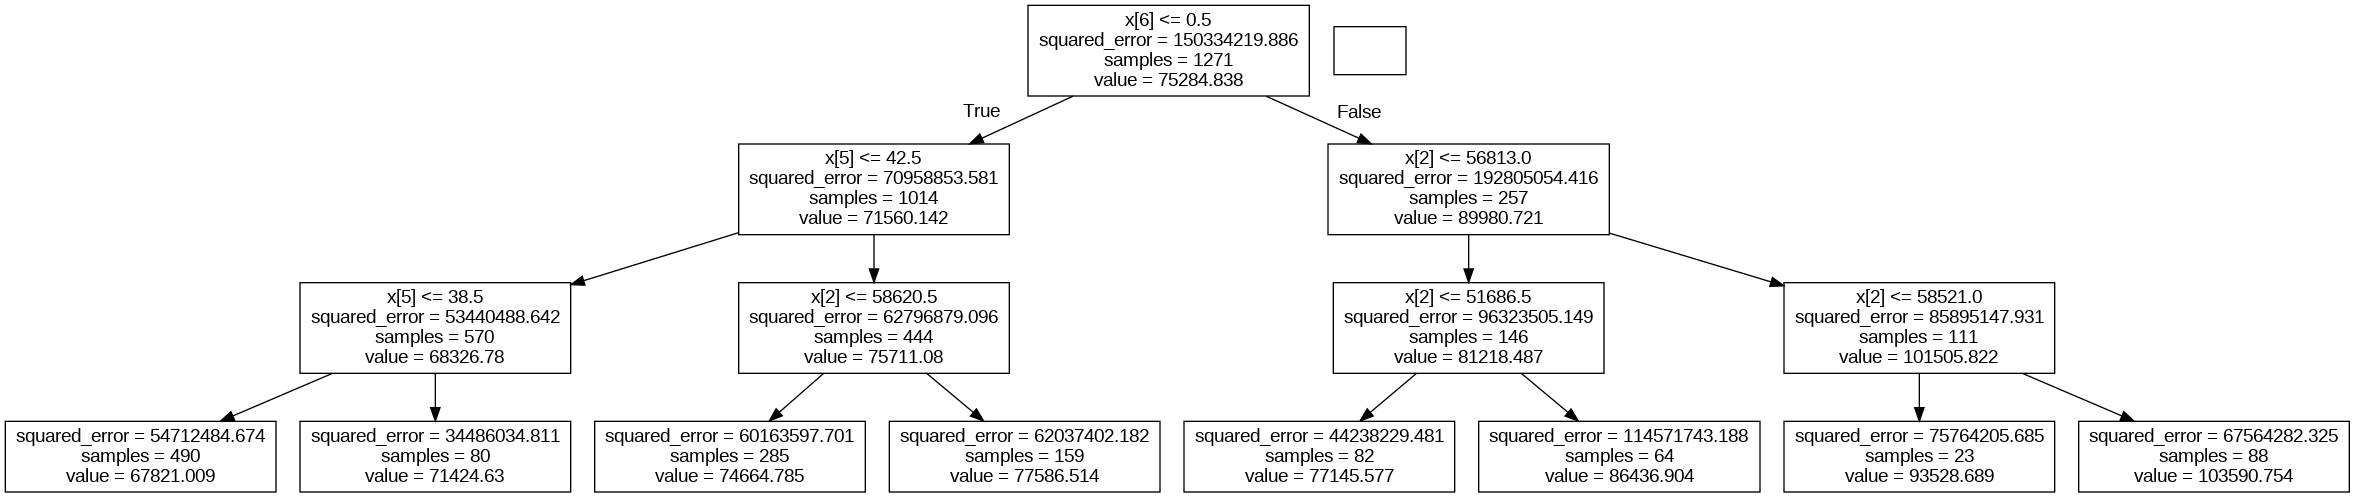

In [75]:
from sklearn import tree
regtree=tree.DecisionTreeRegressor(max_depth=3,min_samples_leaf=20)
regtree.fit(x_train,y_train)

y_train_pred_tree=regtree.predict(x_train)
y_test_pred_tree=regtree.predict(x_test)
y_train_pred_tree
y_test_pred_tree

from sklearn.metrics import r2_score,mean_squared_error
mse_train_tree=mean_squared_error(y_train,y_train_pred_tree)
mse_test_tree=mean_squared_error(y_test,y_test_pred_tree)
r2_score_train_tree=r2_score(y_train,y_train_pred_tree)
r2_score_test_tree=r2_score(y_test,y_test_pred_tree)

dot_data=tree.export_graphviz(regtree,out_file=None)
from IPython.display import Image
import pydotplus
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Random Forest

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score # import metrics for regression problems

rf_model = RandomForestRegressor(n_estimators=250,n_jobs=-1, random_state=42)
rf_model.fit(x_train, y_train)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, rf_model.predict(x_test))
r2 = r2_score(y_test, rf_model.predict(x_test))

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 68875832.3861094
R-squared: 0.6379623977009814


**  The R² of the Random Forest model (0.6379623977009814) is higher than the R² of the Linear Regression model (0.5137747142049216).

** The Random Model Give Highly Accurate Values.

In [77]:
from sklearn.model_selection import GridSearchCV
grid_model=RandomForestRegressor(n_estimators=250,n_jobs=-1,random_state=42)
grid_model.fit(x_train,y_train)
param_grid={'n_estimators':[250,500,750,1000]}
grid_search=GridSearchCV(grid_model,param_grid,cv=5,scoring='neg_mean_squared_error',n_jobs=-1) # Changed scoring parameter to a valid option. neg_mean_squared_error is a common choice for regression
grid_search.fit(x_train,y_train)
grid_search.best_params_
print(grid_search.best_params_)

cvrl_reg=grid_search.best_estimator_
r2_score=r2_score(y_test,cvrl_reg.predict(x_test))
mse=mean_squared_error(y_test,cvrl_reg.predict(x_test))
print("MSE",mse)
print("R2",r2_score)

{'n_estimators': 1000}
MSE 69044302.91380833
R2 0.6370768524553826


** the R² is 0.6370768524553826, which suggests that the model is able to explain approximately 63.7% of the variance in the target variable.
** Gridsearchcv is Gives More Accuracy to R2 value.

In [78]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score # Make sure to import the r2_score function

# Train a gradient boosting regressor model
gb_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
gb_model.fit(x_train, y_train)

# Evaluate the model
y_pred_gb = gb_model.predict(x_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
# Changed variable name from r2_score to r2_gb
r2_gb = r2_score(y_test, y_pred_gb)
print(f'MSE (Gradient Boosting): {mse_gb:.2f}')
print(f'R-Squared (Gradient Boosting): {r2_gb:.2f}')

MSE (Gradient Boosting): 67569288.82
R-Squared (Gradient Boosting): 0.64


## XG BOOST WITH GRID SEARCH

In [86]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the XGBoost model
xgb_model = xgb.XGBRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                          cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)


# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Get the best model from grid search
best_model = grid_search.best_estimator_ # Changed from xgrid to best_model

# Use the best model to predict
r2_score = r2_score(y_test, best_model.predict(x_test)) # Changed xgrid to best_model
mse = mean_squared_error(y_test, best_model.predict(x_test)) # Changed xgrid to best_model
print("MSE",mse)
print("R2",r2_score)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
MSE 71799261.23093203
R2 0.6225957424780264


** The XGBoost model with GridSearchCV has achieved a high R-squared value of 0.62, indicating that it is able to explain a large proportion of the variance in the target variable.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

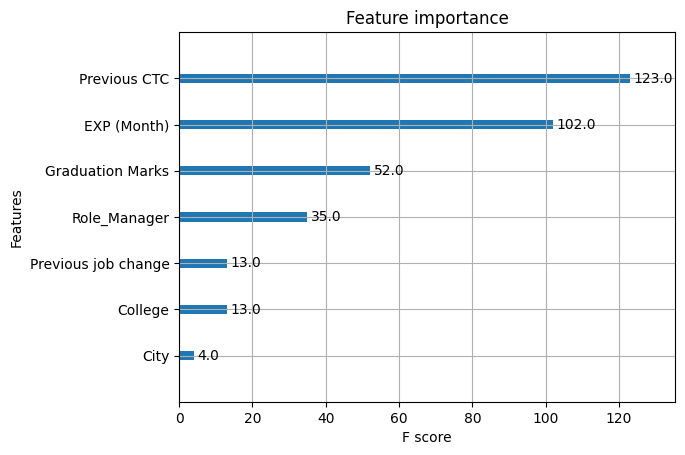

In [87]:
xgb.plot_importance(best_model)

** Chart show Previous CTC AND EXP(month) are Highly Impacting On CTC
And City ,College Are Very Less Impacting on CTC


## Based on the results, the Random Forest model is the most suitable choice for this dataset.The high R² value obtained from the Random Forest model suggests that it is capable of making highly accurate predictions, making it a reliable choice for future predictions and decision-making.

## R² score of 1.0 represents a perfect model, the model has a score of 64/100.


### ** The Newly Join Employee CTC(SALARY) Depend On Previous CTC ,Exp(Months) and  Marks.

